In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi']=300
import seaborn as sns

import matplotlib.font_manager

plt.rcParams['axes.linewidth'] = 2


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Plot

In [44]:
coords = pd.read_csv('../Data/racmacs_coords_wo_NaN_all_sera.csv')
coords = coords.dropna(axis='rows', how='any')
coords = coords.rename(columns={'Unnamed: 2': 'x', 'Unnamed: 3':'y'})
coords['x'] = -1*coords['x']

sera_df = coords[coords.type=='sera'].copy()
variants_df   = coords[(coords.type=='antigen') & (~coords.name.str.contains("R\d-\d{1,2}"))].copy()
constructs_df = coords[(coords.type=='antigen') & (coords.name.str.contains("R\d-\d{1,2}"))].copy()

In [45]:
# variant colors
variant_groups = [
    {
        'pat': 'SARS1', "group":0,
     'labels': [{'text': 'SARS1', 'loc': (-0.7,-4.6)}]
    },{
        'pat': 'WT|WuG|B.1', "group":1,
     'labels': [{'text': 'Wuhan', 'loc': (-3.6,0.15)}]
    },{
        'pat': 'Alpha', "group":8,
     'labels': [{'text': 'Wuhan', 'loc': (-3.6,0.15)}]
    },{
        'pat': 'Beta', "group":10,
     'labels': [{'text': 'Wuhan', 'loc': (-3.6,0.15)}]
    },{
        'pat': 'Delta', "group":9,
     'labels': [{'text': 'Wuhan', 'loc': (-3.6,0.15)}]
    },{
        'pat': 'Gamma',"group":12,
     'labels': [{'text': r'$\mathbf{\alpha\delta\gamma}$', 'loc': (-3.55,0.5)}, 
                {'text': r'$\mathbf{\beta}$', 'loc': (-0.8,1.3)}]
    },{
        'pat': 'BA.1',"group":21, 
     'labels': [{'text': 'BA.1', 'loc': (-1,-1.7)}]
    },{
        'pat': 'BA.2',"group":23, 
     'labels': [{'text': 'BA.2', 'loc': (-1,-1.7)}]
    },{
        'pat': 'BA.2.12.1',"group":28,
     'labels': [{'text': 'BA.2.12.1', 'loc': (-0.5,0.5)}]
    },{
        'pat': 'BA\.?[45]',"group":24, 
     'labels': [{'text': 'BA.4/5', 'loc': (-0.4,-0.5)}]
    },{
        'pat': 'BQ', "group":32,
     'labels': [{'text': 'BQ', 'loc': (2.4,1.3)}]
    },{
        'pat': 'BA.2.75',"group":29,
     'labels': [{'text': 'BA.2', 'loc': (-0.5,0.5)}]
    },{
        'pat': 'CH.1.1', "group":34,
     'labels': [{'text': 'CH.1.1', 'loc': (4.5,-2.2)}]
    },{
        'pat': 'XBB', "group":32,
     'labels': [{'text': 'XBB', 'loc': (1,-4)}]
    }, {
        'pat': 'EG', "group":41,
     'labels': [{'text': 'EG.5', 'loc': (1,-4)}]    
    }, {
        'pat': 'HV.1', "group":44,
     'labels': [{'text': 'HV.1', 'loc': (1,-4)}]    
    },{
        'pat': 'BA.2.86', "group":42,
     'labels': [{'text': 'BA.2.86', 'loc': (1,-4)}]    
    },{
        'pat': 'JN', "group":45,
     'labels': [{'text': 'JN.1', 'loc': (1,-4)}]    
    }   
]

In [40]:
#variant_cmap = sns.color_palette("icefire", as_cmap=True)
variant_cmap = mpl.cm.get_cmap('Reds')
# Create an array of evenly spaced values between 0 and 1
values = np.linspace(0, 1, 45)
# Get the corresponding colors from the colormap
variant_cmap = [variant_cmap(value) for value in values]
variant_cmap = ["grey"] + variant_cmap
idx_to_color = {}

for idx, var in enumerate(variant_groups):
    #col = variant_cmap(idx)
    col = variant_cmap[var['group']]
    idx_to_color[idx] = var['color'] = col
    variants_df.loc[variants_df.name.str.contains(var['pat']), 'color_idx'] = idx
    
variants_df['color_idx'] = variants_df['color_idx'].astype(int)

In [41]:
# construct bases, colors, and connecting edges
construct_bases = {
    'R1-1': 'B.1',
    'R1-2': 'B.1',
    'R2-1': 'BA.5',
    'R2-2': 'BA.2.12.1',
    'R2-3': 'BA.2.75',
    'R2-4': 'XBB'
}

constructs_df['base'] = constructs_df['color'] = ''
constructs_df['base_x'], constructs_df['base_y'] = 0,0

for i, const in constructs_df.iterrows():
    base = const['name'].split("-")[0]
    constructs_df.loc[i, 'base'] = base
    constructs_df.loc[i, 'color_idx'] = int(variants_df[variants_df.name==base]['color_idx'])
    constructs_df.loc[i, 'base_x'] = variants_df[variants_df.name==base]['x'].item()
    constructs_df.loc[i, 'base_y'] = variants_df[variants_df.name==base]['y'].item()
constructs_df['color_idx'] = constructs_df['color_idx'].astype(int)    

# sera colors
sera = ['Vac', 'Conv', 'Boost', 'BTI_Delta', 'Bi-valent', 'BTI_BA']
sera_cmap = mpl.cm.get_cmap('Greys')
sera_colors = [sera_cmap(i) for i in np.linspace(0.2, 0.9, len(sera))]

In [42]:
constructs_df.base.unique()

shape_dict = {'WuG': 'o', 'BA.5': 'X', 'BA.2.12.1': "^", 'BA.2.75': "*", 'XBB': 'h'
             }

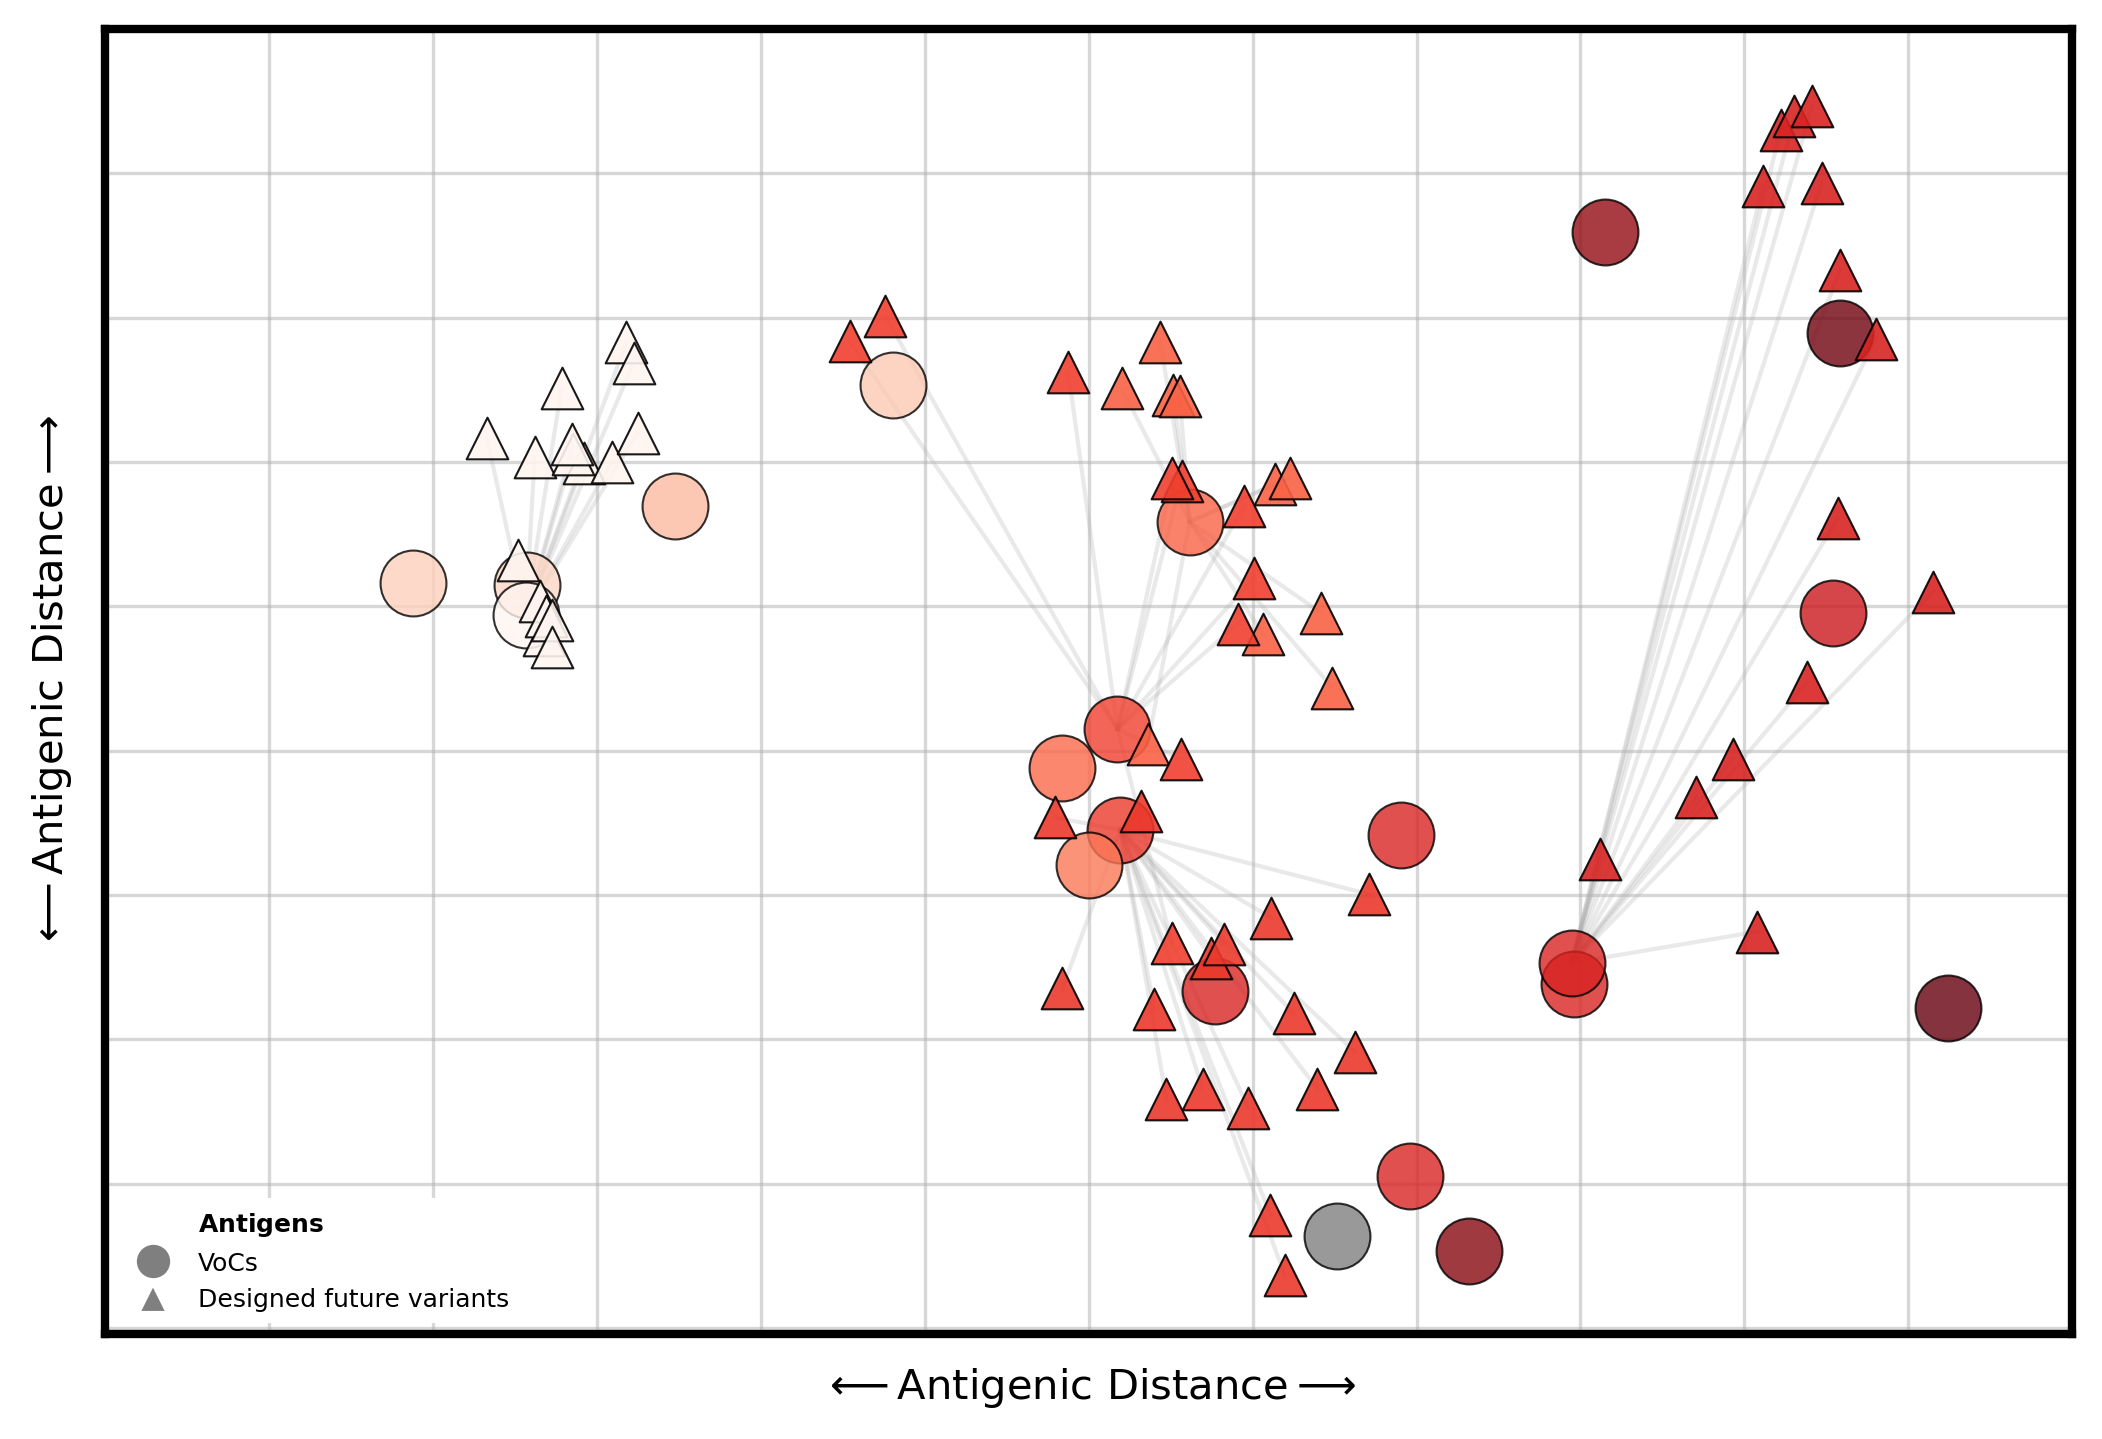

In [43]:
fig, ax = plt.subplots(1,1,figsize=(0.9*(9+0.4),0.9*(6+0.4)))

show_constructs = True
show_sera = True

        
#VARIANTS
for _, var in variants_df[::-1].iterrows():
    ax.scatter(var.x, var.y, marker='o', edgecolor='k', linewidth = 0.5,
               facecolor = idx_to_color[var.color_idx], 
               #facecolor = 'tab:grey', 
               s=250, alpha = 0.8)

#CONSTRUCTS
for _, const in constructs_df.iterrows():
    #ax.scatter(const.x, const.y, marker='^', edgecolor='k',  facecolor = idx_to_color[const.color_idx], s=30, alpha = 0.8)
#     ax.scatter(const.x, const.y, marker=shape_dict[const.base], edgecolor=None, linewidth = 0.5,  
#                facecolor = idx_to_color[const.color_idx], s=80, alpha = 0.9)
    ax.scatter(const.x, const.y, marker='^', edgecolor='k', linewidth = 0.5,  
               facecolor = idx_to_color[const.color_idx], s=100, alpha = 0.9)
    ax.plot([const.base_x, const.x], [const.base_y, const.y], color="darkgrey", alpha=0.25, zorder=-1000, lw=1)

round_away = lambda x: np.sign(x) * np.ceil(np.abs(x))
ax.set_xticks(np.arange(round_away(coords.x.min()), 
                        round_away(coords.x.max())+1, 
                        1))
ax.set_yticks(np.arange(round_away(coords.y.min()), 
                        round_away(coords.y.max())+1, 
                        1))

from matplotlib.patches import Rectangle
voc_const_handles = [
    Line2D([], [], color='w', markerfacecolor='tab:grey', marker='o', markersize=9),
    Line2D([], [], color='w', markerfacecolor='tab:grey', marker='^', markersize=7)
]

legend = ax.legend(handles=voc_const_handles, loc = "lower left",
          labels=['VoCs', 'Designed future variants'], 
              frameon=True, facecolor='w', framealpha=1, 
              fancybox=False, edgecolor='w', title=r'$\mathbf{Antigens}$',fontsize=6)
plt.setp(legend.get_title(),fontsize=6,x=70)
legend._legend_box.align = "left"

from matplotlib import cm, colors
# cmap = cm.get_cmap("Reds")
# fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(0, 44), cmap=cmap), ax=ax, orientation = "horizontal")

ax.grid(alpha=0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlabel(r"$\longleftarrow$" + "Antigenic Distance"  + r"$\longrightarrow$")
plt.ylabel(r"$\longleftarrow$" + "Antigenic Distance"  + r"$\longrightarrow$")
ax.tick_params(axis='both', which='both',length=0)
ax.set_axisbelow(True)
#fig.savefig('../../../figures/antigenic_map_Jan2024_woNaN.svg')